In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
df=pd.read_csv('titanic_toy.csv')

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [10]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [11]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [17]:
X_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [21]:
mean_Age= X_train['Age'].mean()
median_Age= X_train['Age'].median()
mean_Fare= X_train['Fare'].mean()
median_Fare= X_train['Fare'].median()

In [22]:
X_train['Age_mean']=X_train['Age'].fillna(mean_Age)
X_train['Age_median']=X_train['Age'].fillna(median_Age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_Age)
X_train['Fare_median']=X_train['Fare'].fillna(median_Age)

In [23]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
45,NaN,8.05,0,29.498846,28.0,8.050000,8.05
487,58.0,29.70,0,58.000000,58.0,29.700000,29.70
464,NaN,8.05,0,29.498846,28.0,8.050000,8.05
400,39.0,NaN,0,39.000000,39.0,29.498846,28.00
95,NaN,8.05,0,29.498846,28.0,8.050000,8.05


In [26]:
print('Original Age variable variance: ',X_train['Age'].var())
print('Age veriance variable after mean imputation: ',X_train['Age_mean'].var())
print('Age veriance variable after median imputation: ',X_train['Age_median'].var())
print('Original Fare variable variance: ',X_train['Fare'].var())
print('Fare veriance variable after mean imputation: ',X_train['Fare_mean'].var())
print('Fare veriance variable after median imputation: ',X_train['Fare_median'].var())

Original Age variable variance:  210.2517072477438
Age veriance variable after mean imputation:  168.8519336687225
Age veriance variable after median imputation:  169.20731007048096
Original Fare variable variance:  2761.031434948639
Fare veriance variable after mean imputation:  2621.6705110298403
Fare veriance variable after median imputation:  2622.2135607276828


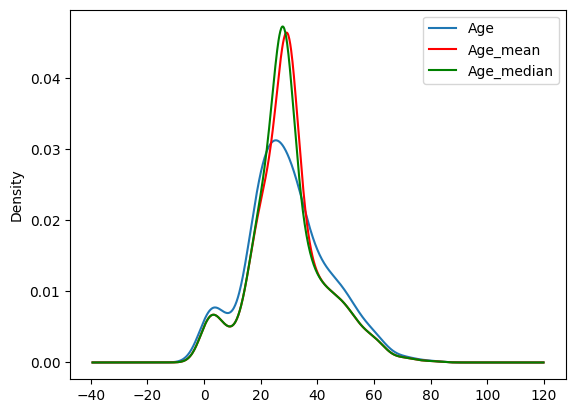

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original variable distribution
X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')
#add legends
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


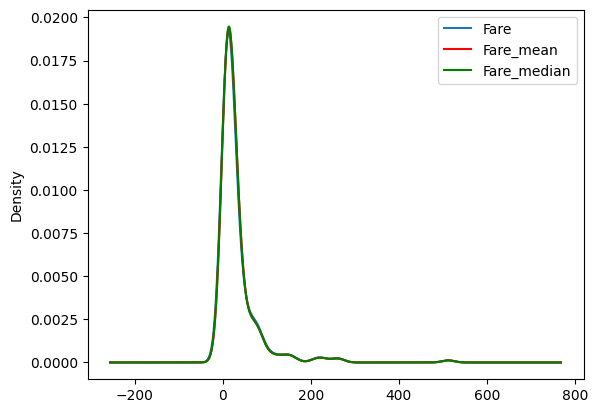

In [30]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')
#add legends
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


In [32]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.008529,70.916562
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.659866,17.661074
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.026540,56.952682
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.538695,60.458269
Fare_mean,71.008529,2761.031435,17.659866,57.026540,60.538695,2621.670511,2621.888037
Fare_median,70.916562,2761.031435,17.661074,56.952682,60.458269,2621.888037,2622.213561


In [33]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088692,0.088561
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204992,0.204985
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085711,0.085591
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.090894,0.090764
Fare_mean,0.088692,1.000000,0.204992,0.085711,0.090894,1.000000,0.999979
Fare_median,0.088561,1.000000,0.204985,0.085591,0.090764,0.999979,1.000000


<Axes: >

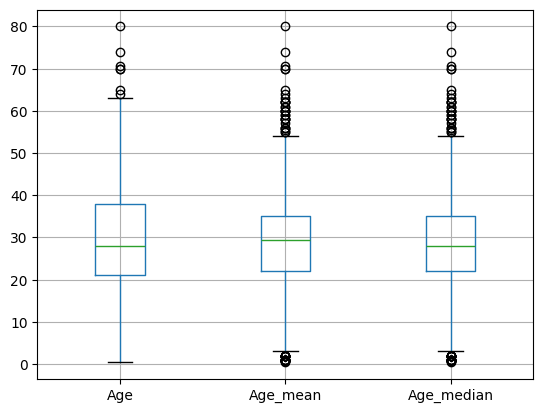

In [34]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

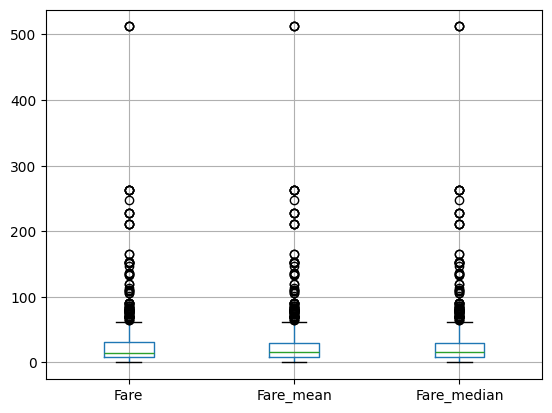

In [35]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

#Using Sklearn

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
imputer1= SimpleImputer(strategy='mean')
imputer2= SimpleImputer(strategy='median')

In [40]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
     ],remainder='passthrough')

In [41]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [42]:
trf.named_transformers_['imputer1'].statistics_

array([29.49884615])

In [43]:
trf.named_transformers_['imputer2'].statistics_

array([14.4])

In [44]:
X_train_transformed=trf.transform(X_train)
X_test_transformed=trf.transform(X_test)

In [46]:
X_train_transformed

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

Arbitary Value imputation


In [74]:
X_train['Fare_minus1']=X_train['Fare'].fillna(-1)
X_train['Fare_99']=X_train['Fare'].fillna(99)
X_train['Age_minus1']=X_train['Age'].fillna(-1)
X_train['Age_99']=X_train['Age'].fillna(-1)

In [60]:
print('Original Age variable variance: ',X_train['Age'].var())
print('Age veriance variable after X_99: ',X_train['Age_99'].var())
print('Age veriance variable after X_minus1: ',X_train['Age_minus1'].var())
print('Original Fare variable variance: ',X_train['Fare'].var())
print('Fare veriance variable after X_99: ',X_train['Fare_99'].var())
print('Fare veriance variable after X_minus1: ',X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477438
Age veriance variable after X_99:  315.99550362600644
Age veriance variable after X_minus1:  315.99550362600644
Original Fare variable variance:  2761.031434948639
Fare veriance variable after X_99:  2833.708690936757
Fare veriance variable after X_minus1:  nan


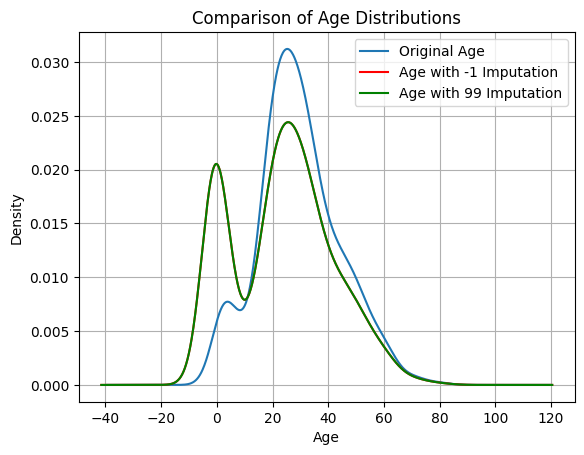

In [62]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot KDE of original and imputed Age columns
X_train['Age'].plot(kind='kde', ax=ax, label='Original Age')
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='red', label='Age with -1 Imputation')
X_train['Age_99'].plot(kind='kde', ax=ax, color='green', label='Age with 99 Imputation')

# Add legend automatically using labels
ax.legend(loc='best')

# Show the plot
plt.title('Comparison of Age Distributions')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


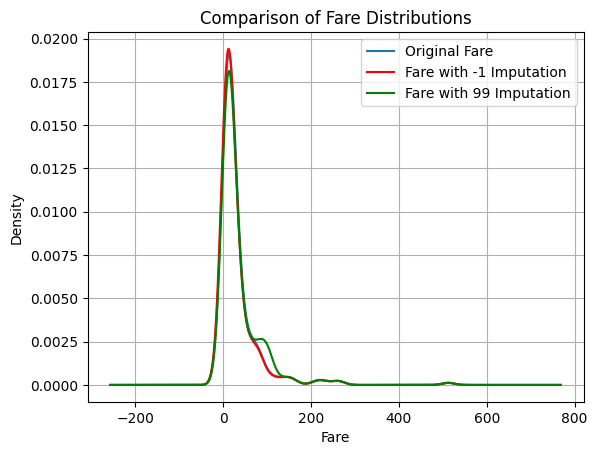

In [75]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot KDE of original and imputed Fare columns
X_train['Fare'].plot(kind='kde', ax=ax, label='Original Fare')
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='red', label='Fare with -1 Imputation')
X_train['Fare_99'].plot(kind='kde', ax=ax, color='green', label='Fare with 99 Imputation')

# Add legend and grid
ax.legend(loc='best')
ax.set_title('Comparison of Fare Distributions')
ax.set_xlabel('Fare')
ax.set_ylabel('Density')
ax.grid(True)

# Show plot
plt.show()


#Using Sklearn

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
imputer1= SimpleImputer(strategy='constant',fill_value=99)
imputer2= SimpleImputer(strategy='constant',fill_value=999)

In [78]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
     ],remainder='passthrough')

In [79]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [80]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [81]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [82]:
X_train_transformed=trf.transform(X_train)
X_test_transformed=trf.transform(X_test)

In [83]:
X_train_transformed

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])